Question 1: In which year are mango prices more expensive, 2019 or 2020?

First we generate descriptive statistics for each year, then plot out the average prices in a box graph.

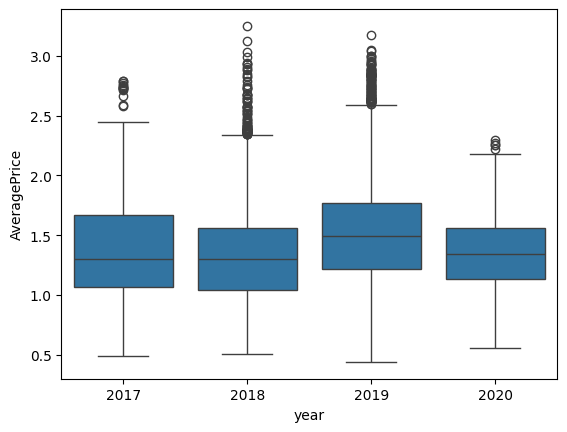

AveragePrice                                                         ID  \
            count      mean       std   min   25%    50%   75%   max   count   
year                                                                           
2019       5722.0  1.515128  0.432906  0.44  1.22  1.490  1.77  3.17  5722.0   
2020       1296.0  1.347531  0.305858  0.56  1.13  1.345  1.56  2.30  1296.0   

                 ...      Type3             XLarge Bags               \
           mean  ...        75%         max       count         mean   
year             ...                                                   
2019  25.991087  ...  3441.4425  1664383.09      5722.0  4193.843471   
2020   5.500000  ...  4185.6800  1066830.22      1296.0  5563.728295   

                                                       
               std  min  25%  50%      75%        max  
year                                                   
2019  20588.640836  0.0  0.0  0.0  447.585  377661.06  
2020  25818.259882  0.0  0.0  0.0  842.070  309467.53  

[2 rows x 96 columns]

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fo
mangos_17_20 = pd.read_csv("mango17-19.csv", decimal=",", thousands=".")
mangos_17_20.drop(['Small Bags','Large Bags','XLarge Bags','ID'],axis=1)
mangos_17 = mangos_17_20[mangos_17_20['year']==2017]
mangos_18 = mangos_17_20[mangos_17_20['year']==2018]
mangos_19 = mangos_17_20[mangos_17_20['year']==2019]
mangos_20 = mangos_17_20[mangos_17_20['year']==2020]
mangos_19_20 = pd.concat([mangos_19,mangos_20],join='outer', sort=True)
sns.boxplot(x="year", y="AveragePrice", data=mangos_17_20)
plt.show()
mangos_19_20.groupby("year").describe()


This initial assessment shows that prices were lower on average in 2020 versus 2019.

Next, we will seperate the average price data month by month for each year and plot it in a line graph.

<ipython-input-4-ab1d50d672d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mangos_17['month'] = pd.DatetimeIndex(mangos_17['Date'],dayfirst=True).month
<ipython-input-4-ab1d50d672d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mangos_18['month'] = pd.DatetimeIndex(mangos_18['Date'],dayfirst=True).month
<ipython-input-4-ab1d50d672d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

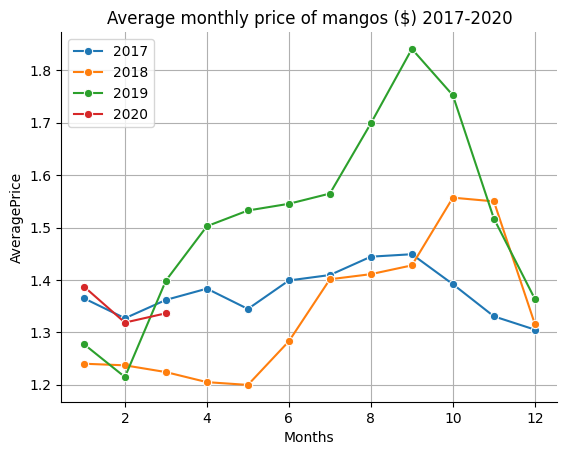

In [4]:
mangos_17['month'] = pd.DatetimeIndex(mangos_17['Date'],dayfirst=True).month
sns.lineplot(x="month", y="AveragePrice", errorbar=None, marker='o', label='2017', data=mangos_17)

mangos_18['month'] = pd.DatetimeIndex(mangos_18['Date'],dayfirst=True).month
sns.lineplot(x="month", y="AveragePrice", errorbar=None,marker='o', label='2018',data=mangos_18)

mangos_19['month'] = pd.DatetimeIndex(mangos_19['Date'],dayfirst=True).month
sns.lineplot(x="month", y="AveragePrice", errorbar=None,marker='o',label='2019',data=mangos_19)

mangos_20['month'] = pd.DatetimeIndex(mangos_20['Date'],dayfirst=True).month
sns.lineplot(x="month", y="AveragePrice", errorbar=None,marker='o',label='2020',data=mangos_20)

plt.legend(loc='upper left')
plt.xlabel('Months')
plt.grid(True)
sns.despine()
plt.title('Average monthly price of mangos ($) 2017-2020')
plt.show()

The first observation we can make here is the lack of data for 2020. With only 3 months of data, we can only make an estimate of how the prices will change through the rest of the year. When plotted in the line graph, we can see that initially prices in 2020 are higher than 2019 in January and February, until 2019 sees a much higher spike in March. With the data seperated into months, we can see trends from all four years, where prices tend to rise from May to September approximately. This would indicate that prices would likely rise significantly in 2020 in that timeframe. Although the prices for 2020 follow closer to 2017 than 2019, it is likely to be higher due to factors such as inflation.  Given this information, it is not possible to determine with certainty whether 2019 or 2020's prices are higher overall.

Question 2: What type of mangoes (organic or conventional) are more profitable?

First we will compare the profitability per unit for each type of mango, conventional and organic, and represent the data in a bar graph.

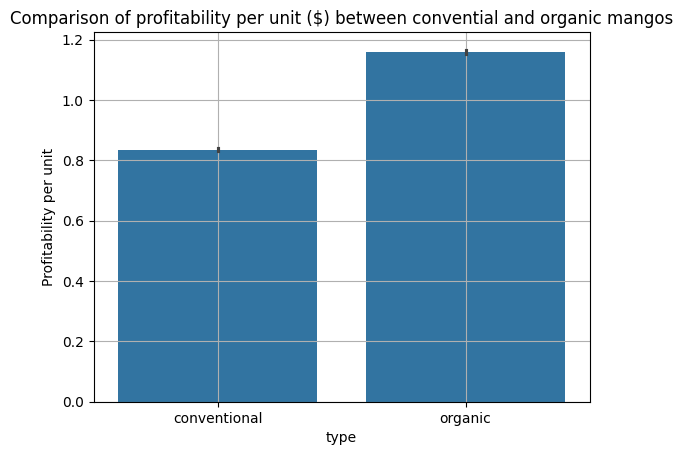

TypeError: agg function failed [how->mean,dtype->object]

In [6]:
sns.barplot(x="type", y="Profitability per unit", data=mangos_17_20)
plt.title('Comparison of profitability per unit ($) between convential and organic mangos')
plt.grid(True)
plt.show()
mangos_17_20.groupby("type").mean()

Organic mangos were more profitable per unit and were found on average to be 32
cents more profitable than conventional mangos. On average profits for organic mangos
were 1.16 dollars per unit whereas conventional mangos were 0.84 dollars per unit.

Then we will generate a correlation matrix and scatter graph comparing the average price and profitability per unit.

ValueError: could not convert string to float: '27/12/2017'

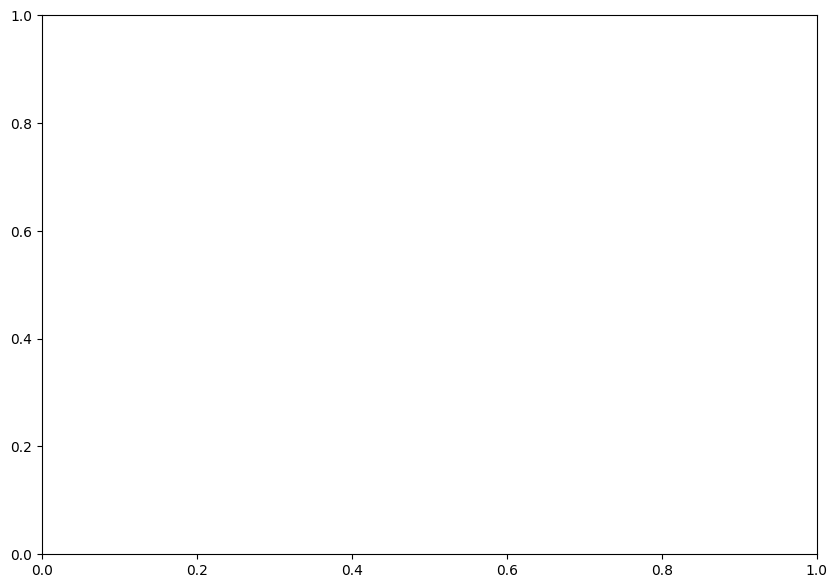

In [7]:
f,ax = plt.subplots(figsize = (10,7))
sns.heatmap(mangos_17_20.corr(), annot=True, cmap='Blues', linewidths=0.5, linecolor='black',fmt='.2f',ax=ax)
plt.title('Correlation Matrix')

In [ ]:
sns.scatterplot(x="AveragePrice", y="Profitability per unit", hue = 'type', data=mangos_17_20)
plt.title('Average price versus profitability per unit ($) by type of mango')
plt.grid(True)
sns.despine()

As shown in correlation matrix, there is a relatively strong correlation between the price and profitability of mangos. This shows that the costs to produce mangos are mostly fixed as profits follow closely to price raises.